To run talib library you'll need to do it locally (not cloud)
To install talib: https://blog.quantinsti.com/install-ta-lib-python/

In [2]:
#numerical and well known libraries:
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime as dt

#library for charts
import mplfinance as mpf
from mplfinance import original_flavor

#libraries for technical analysis
import btalib
import talib

#for metatrader integration:
import MetaTrader5 as mt5

#importing my own libraries:
import Functions as f
import Strategies as s

## Functions: get data
they're made to download price data

There are 6 of them:
- get_data()
- get_data_yh()
- get_data_yh_intraday()
- get_data_mt5()
- get_data_tensor()
- get_data_binance()

They have in common that they prepare price data in the following basic structure:
- index: Date / Time
- columns: symbol, Open, High, Low, Close, Volume

some of them also output some others columns
and all of them have default inputs, which means you don't need to enter any input necesarily.


get_data(symbol='BTC-USD', months=12,source='yahoo')

get_data_yh(symbol='BTC-USD',years=1)

the first 2 do the same:
download and DataFrame daily data from yahooFinance
- The firstone uses pandas_datareader library, and also allows other sources (look for pandas datareader documentation).
- The second one uses only pandas, and has the capability to get data ONLY from yahoo.

In [10]:
df1 = f.get_data()
df2 = f.get_data_yh()

print(df1.tail(3))
print(df2.tail(3))

             symbol          Open          High           Low         Close  \
Date                                                                          
2020-10-31  BTC-USD  13546.532227  14028.213867  13457.530273  13780.995117   
2020-11-01  BTC-USD  13780.995117  13862.033203  13628.377930  13737.109375   
2020-11-03  BTC-USD  13507.269531  13769.055664  13335.282227  13723.519531   

               Adj Close        Volume  
Date                                    
2020-10-31  13780.995117  3.030646e+10  
2020-11-01  13737.109375  2.445386e+10  
2020-11-03  13723.519531  2.778187e+10  
             symbol          Open          High           Low         Close  \
Date                                                                          
2020-11-01  BTC-USD  13780.995117  13862.033203  13628.377930  13737.109375   
2020-11-02  BTC-USD           NaN           NaN           NaN           NaN   
2020-11-03  BTC-USD  13507.269531  13769.055664  13335.282227  13723.519531   

   

get_data_yh_intraday(symbol='GOOG',interval='60m',days=30)

it outputs the same results as previous ones, it's only for yahoo source, but it allows multiple timeframes.

In [9]:
df3 = f.get_data_yh_intraday()
df3.head(3)

[*********************100%***********************]  1 of 1 completed


,symbol,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,,
2020-10-05 09:30:00-04:00,GOOG,1466.209961,1475.109985,1464.270020,1475.109985,1475.109985,210993
2020-10-05 10:30:00-04:00,GOOG,1475.079956,1485.910034,1475.079956,1484.430054,1484.430054,126143
2020-10-05 11:30:00-04:00,GOOG,1484.439941,1484.479980,1478.699951,1481.550049,1481.550049,105183


get_data_mt5(symbol='EURUSD',bars=500,to=0, timeframe='H1')

to use it you need to have installed MetaTrader5 in your PC.
It opens MetaTrader5, connects, and get the DataFrame.

It allows intraday Data

In [12]:
df4 = f.get_data_mt5()
df4.head(3)

,symbol,Open,High,Low,Close,Volume,spread,real_volume
time,,,,,,,,
2020-10-06 03:00:00,EURUSD,1.17890,1.17930,1.17863,1.17907,3154,2,0
2020-10-06 04:00:00,EURUSD,1.17907,1.17929,1.17859,1.17863,3785,2,0
2020-10-06 05:00:00,EURUSD,1.17862,1.17913,1.17858,1.17912,2414,2,0


get_data_tensor(timeframe='1h',mode=2,extra_data=True,symbol='XBTUSD',source='bitmex')

Its source is www.tensorcharts.com/
Uses request library, gets a limited data (short timestamp) for cryptocurrencies market, but it allows output many columns which describe lots of information about trading volume

In [15]:
df5 = f.get_data_tensor()
df5.head(3)

,symbol,Open,High,Low,Close,Volume,buyVolume,sellVolume,askVolume,bidVolume,...,OB: 15030,OB: 15040,OB: 15050,OB: 15060,OB: 15070,OB: 15080,OB: 15090,OB: 15100,OB: 15110,OB: 15120
2020-10-26 04:00:00+00:00,XBTUSD,13098.5,13141.5,13058.0,13123.0,2513.136561,1332.100096,1181.036465,2.709501e+08,1.139516e+08,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-10-26 05:00:00+00:00,XBTUSD,13123.0,13151.5,13096.5,13105.5,2465.778375,1107.583884,1358.194491,2.682147e+08,1.083339e+08,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0
2020-10-26 06:00:00+00:00,XBTUSD,13105.0,13114.0,13077.0,13090.0,1834.353044,854.508881,979.844163,2.690544e+08,1.075171e+08,...,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


get_data_binance(symbol='BTCUSDT', start_time='2020-06-22', end_time='2020-06-25',interval_mins=60)

its almost the same as before, for cryptocurrency market intraday data

In [16]:
df6 = f.get_data_binance()
df6.head(3)

https://www.binance.com/fapi/v1/klines?interval=1h&limit=1000&symbol=BTCUSDT&startTime=1592784000000&endTime=1593039600000


,Open,High,Low,Close,Volume,a,b,c,d,e,f,symbol
time,,,,,,,,,,,,
2020-06-22 00:00:00,9293.39,9335.00,9273.00,9320.35,6844.982,1592787599999,63709800.12935,19578,4040.817,37612137.02898,0,BTCUSDT
2020-06-22 01:00:00,9320.35,9388.00,9317.40,9382.58,9507.792,1592791199999,88949731.99845,26350,5906.068,55259042.88441,0,BTCUSDT
2020-06-22 02:00:00,9382.57,9394.43,9362.21,9381.65,7371.039,1592794799999,69123876.40868,20220,3933.913,36895122.02192,0,BTCUSDT


# Charts

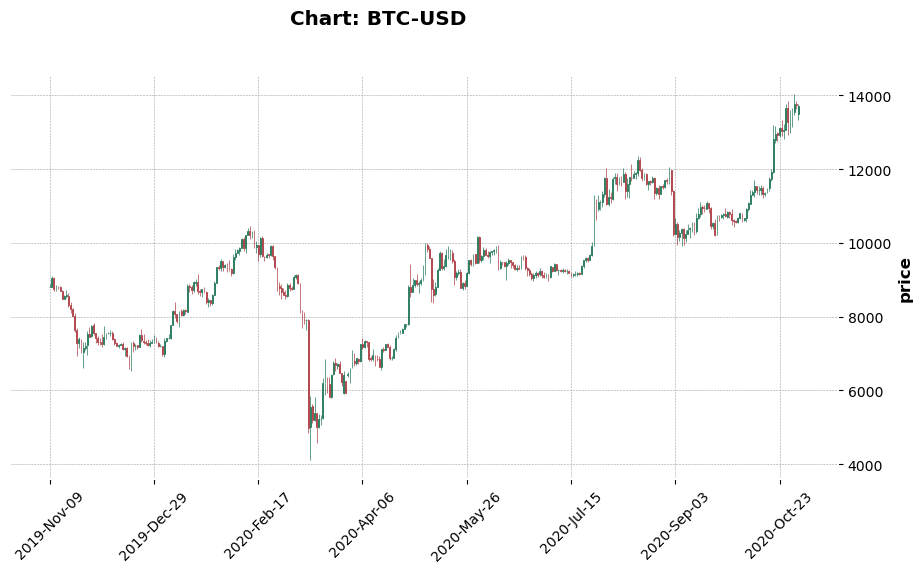

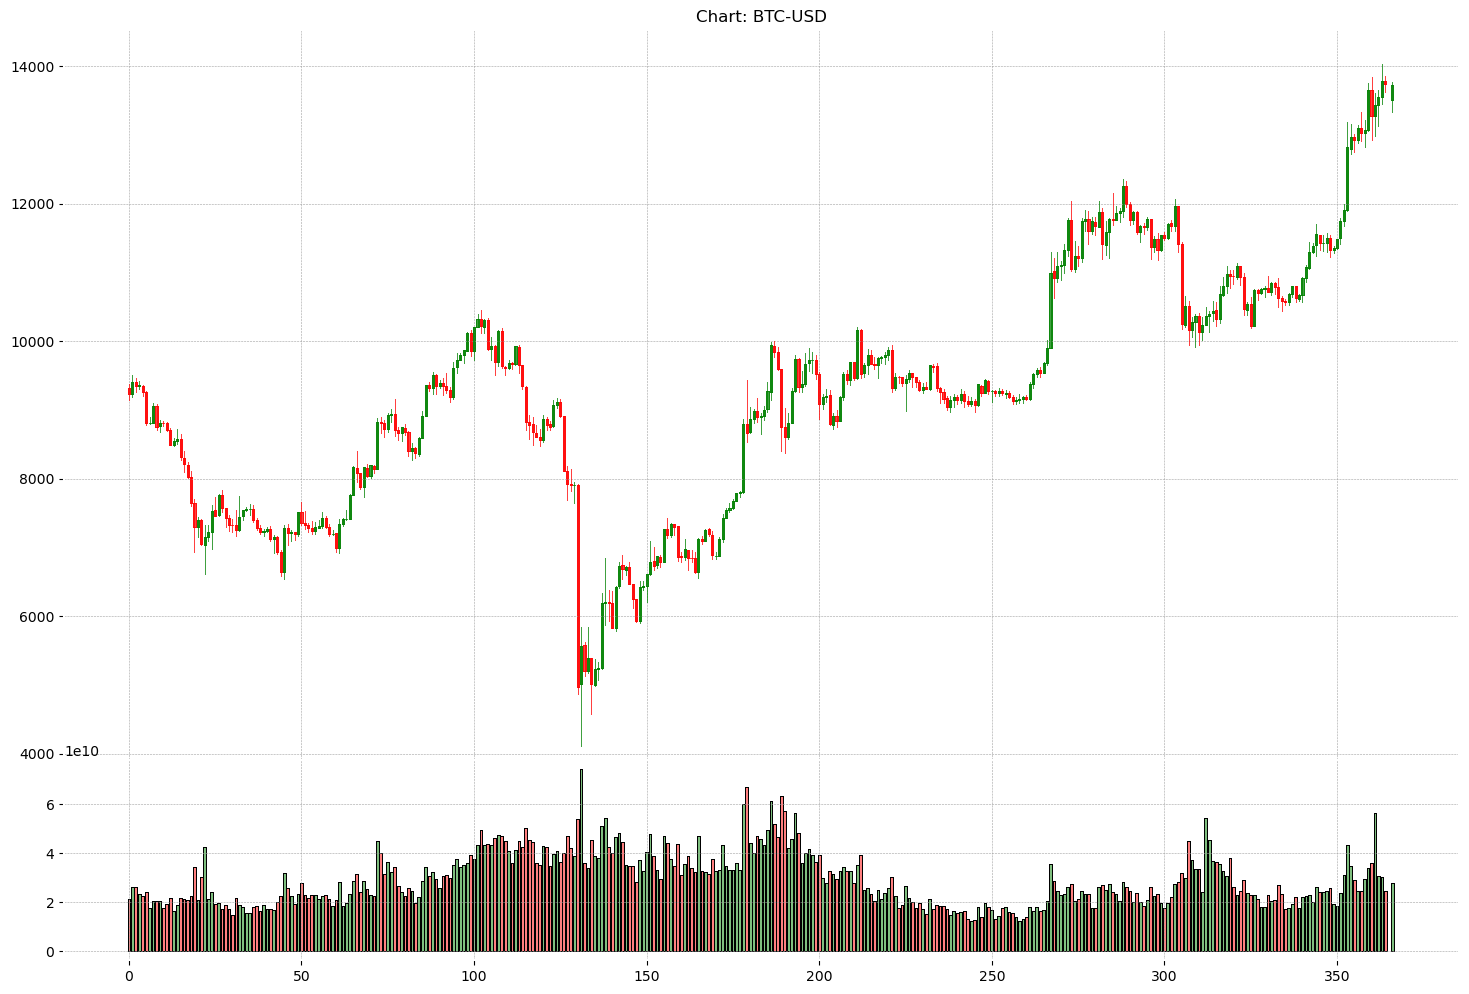

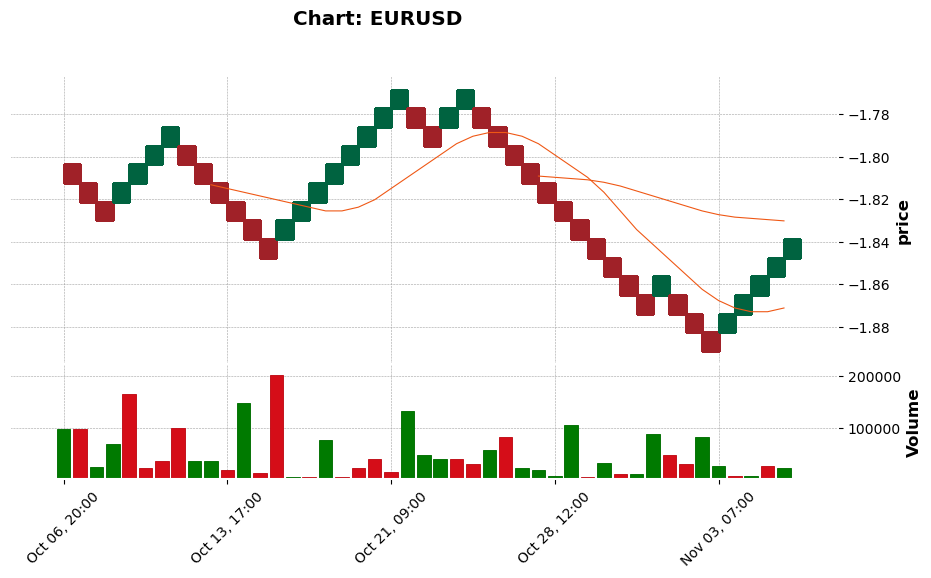

In [23]:
f.chart(df1)
f.chart_(df2,vol=True)
f.chart(df4,type='renko',vol=True,MA=(10,30),log=True)

# get indicators

In [ ]:
get_indicators(data,fast=20,slow=50)

In [28]:
df_ind = f.get_indicators(df1)
df_ind.tail(3)

,symbol,Open,High,Low,Close,Adj Close,Volume,macd,macd_signal,macd_hist,rsi,ma_fast,ma_slow,prev_ma_fast,engulfing,morningstar
Date,,,,,,,,,,,,,,,,
2020-10-31,BTC-USD,13546.532227,14028.213867,13457.530273,13780.995117,13780.995117,3.030646e+10,669.031981,571.993113,97.038868,77.307618,12467.729199,11446.146328,12347.888525,0,0
2020-11-01,BTC-USD,13780.995117,13862.033203,13628.377930,13737.109375,13737.109375,2.445386e+10,672.666894,592.127869,80.539025,76.019441,12576.816504,11512.045098,12467.729199,0,0
2020-11-03,BTC-USD,13507.269531,13769.055664,13335.282227,13723.519531,13723.519531,2.778187e+10,666.764951,607.055286,59.709665,75.599347,12691.697510,11580.040371,12576.816504,0,0


In [ ]:

df = f.get_data(months=50)
df = f.get_indicators(df)
df = f.signal_to_position(df,'engulfing')#,side='long')
# f.plot_signal(df,'position',lines=True, marker=7)
# position = f.backtest(df,'position')
f.plot_backtest(df, position='position',leverage=3)

In [ ]:

# df = f.get_data()

# f.chart(df,vol=True,)

# #f.plot_morningstar('AMD',60)

# #f.conect_data(['SPY','AAPL','TUP','CL'],'t')


# # rsi = btalib.rsi(df)
# # df['rsi'] = rsi.df
# # df['rsi_signal'] = np.where(df['rsi'] > 75,-1,0)
# # df['rsi_signal'] = np.where(df['rsi'] < 25,1,df['rsi_signal'])
# # #f.plot_signal(df, 'rsi_signal')

# # df = f.get_data('AMD',months=10,source='yahoo')
# # ind = f.get_indicators(df)
# # f.chart(ind,log=True,vol=True,MA=(20,50,100))
# # f.plot_signal(ind,'morningstar',lines=True,marker=1)
# # ind['position'] = np.where(ind['ma_fast'] > ind['ma_slow'], 1,0)
# # ind['position'] = np.where(ind['ma_fast'] < ind['ma_slow'], -1,ind['position'])



# data = f.get_data_()
# data['price'] = data['Adj Close']
# SMA = 25
# data['SMA'] = data['price'].rolling(window=SMA).mean()
# N = 1
# data['STD'] = N*data['price'].rolling(window=SMA).std()
# data['SMA+STD'] = data['SMA'] + data['STD']
# data['SMA-STD'] = data['SMA'] - data['STD']
# plt.style.use('seaborn')
# #data[['price','SMA+STD','SMA-STD']].plot(figsize=(24,6))
# data['position'] = np.where(data['price'] > data['SMA+STD'], -1,0)
# data['position'] = np.where(data['price'] < data['SMA-STD'], 1,data['position'])

# f.plot_signal(data,'position',lines=True,marker=1)



# # ko_m5 = f.get_data_mt5('KO',bars=200,timeframe='M5')
# # print(ko_m5)
# # f.chart_(ko_m5,vol=True)
# # f.backtrader(ko_m5,strategy=s.TestStrategy)
# # f.get_order(symbol='KO',lot=1.0)


# # symbols=['TSLA', 'AAPL', 'AMZN', 'NFLX']
# # f.conect_data()




df = f.get_data_yh(years=2,symbol='TSLA')
df = f.get_indicators(df)
# #print(df)
df = f.signal_to_position(df,'engulfing',side='long')

# #f.plot_signal(df,'morningstar',lines=True)
f.plot_backtest(df, 'position',returns='simple',leverage=1)
# # position = f.backtest(df,'position')
# # f.plot_backtest(position)




# # data =f.get_data_tensor(timeframe='4h',mode=2,symbol='ETHUSD',extra_data=True)
# data = f.get_data_binance(symbol='BTCUSDT',start_time='2020-06-22', end_time='2020-06-25',interval_mins=60)
# print(data)
# f.chart(data,vol=True)
